In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargowda/suicide-rates-overview-1985-to-2021")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'suicide-rates-overview-1985-to-2021' dataset.
Path to dataset files: /kaggle/input/suicide-rates-overview-1985-to-2021


In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2021/master.csv')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [14]:
df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

In [17]:
#Yearly rate of suicide of all the data
df_yearly_rate = df.groupby('year')[['suicides_no','population']].sum().reset_index()
df_yearly_rate['per_100k'] = df_yearly_rate.apply(lambda row: (row['suicides_no'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)

fig = px.line(df_yearly_rate,
              x='year',
              y='per_100k',
              markers=True)

fig.update_layout(title_text='Yearly Global Suicide Rate')

fig.show()

In [20]:
#Investigatin why there was a decling in the number of suicides and population count in the year 2016.
df_2015 = df[df['year'] <= 2015]
df_2015_population = df_2015.groupby('country')['population'].sum().reset_index()
#df_2015_population

df_2016 = df[df['year'] >= 2016]
df_2016_population = df_2016.groupby('country')['population'].sum().reset_index()
#df_2016_population

#Removeing data after 2015 due to a huge inconsistency in data
df_clean = df[df['year'] <= 2015]

#Overall averages for each sex
df_overall_averages_sex = df_clean.groupby('sex')[['suicides_no','population']].sum().reset_index()
df_overall_averages_sex['per_100k'] = df_overall_averages_sex.apply(lambda row: (row['suicides_no'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)
#df_overall_averages_sex

fig = go.Figure(data=[go.Table(
    header=dict(values=['Sex','Total Number of Suicides', 'Suicide Rate Per 100K'],
                fill_color = 'darkgray',
                align='left'),
    cells=dict(values=[['Female', 'Male'], df_overall_averages_sex['suicides_no'], df_overall_averages_sex['per_100k']],
               fill_color = 'lightgray',
               align='left'))])

fig.update_layout(font=dict(color='black'),
                 title_text = 'Suicide Data Split By Gender')

fig.show()

In [21]:
#Yearly rate of suicide for each gender
df_yearly_rate_by_sex = df_clean.groupby(['year', 'sex'])[['suicides_no','population']].sum().reset_index()
df_yearly_rate_by_sex['per_100k'] = df_yearly_rate_by_sex.apply(lambda row: (row['suicides_no'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)
#df_yearly_rate_by_sex

fig = px.line(df_yearly_rate_by_sex,
             x='year',
             y='per_100k',
             color='sex',
             markers= True)
fig.update_layout(title_text='Yearly Global Suicide Rate Split By Sex')

fig.show()

In [22]:
#Suicide Rates By Age Group
df_overall_averages_age = df_clean.groupby(['age','year'])[['suicides_no','population']].sum().reset_index()
df_overall_averages_age['per_100k'] = df_overall_averages_age.apply(lambda row: (row['suicides_no'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)

fig= px.line(df_overall_averages_age,
            x = 'year',
            y = 'per_100k',
            color='age',
            markers=True,
            labels=dict(year = 'Year',
                       per_100k = 'Per 100K Population',
                       age = 'Age Group'))

fig.update_layout(title_text = 'Yearly Suicide Rates Of Given Age Group')

fig.show()

In [23]:
#Suicide Rates By Generation
df_overall_averages_generation = df_clean.groupby('generation')[['suicides_no','population']].sum().reset_index()
df_overall_averages_generation['per_100k'] = df_overall_averages_generation.apply(lambda row: (row['suicides_no'] / row['population']) * 100_000 if row['population'] != 0 else 0, axis=1)
#df_overall_averages_generation

fig = px.pie(df_overall_averages_generation,
             values = 'suicides_no',
             names = 'generation',
             hover_data = ['per_100k'],
             labels = dict(suicide_no = 'Total Amount of Suicides',
                           generation = 'Generation',
                           per_100k = 'Suicide Rate Per 100K'),
            height=650)

fig.update_traces(textposition ='inside', textinfo='percent+value+label')
fig.update_layout(title_text='Sum of Suicides Per Generation')

fig.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data Preparation for Regression Models ---
# Start with df_clean (data up to 2015)
df_reg = df_clean.copy()

# Map age groups to numerical values for ordinal representation
age_mapping = {
    '5-14 years': 10,
    '15-24 years': 20,
    '25-34 years': 30,
    '35-54 years': 45, # Midpoint of the range
    '55-74 years': 65, # Midpoint of the range
    '75+ years': 80
}
df_reg['age_numerical'] = df_reg['age'].map(age_mapping)

# Drop rows where 'age_numerical' could not be mapped (if any invalid age groups exist)
df_reg.dropna(subset=['age_numerical'], inplace=True)

# One-hot encode 'sex' and 'generation'
df_reg = pd.get_dummies(df_reg, columns=['sex', 'generation'], drop_first=True)

# Define features (X) and target (y) for regression
features = ['age_numerical'] + \
           [col for col in df_reg.columns if col.startswith('sex_') or col.startswith('generation_')]

X = df_reg[features]
y_linear = df_reg['suicides_pop'] # Target for linear regression

# For logistic regression, we need a binary target variable.
# Let's define 'high_suicide_rate' as being above the median 'suicides_pop'.
median_suicides_pop = df_reg['suicides_pop'].median()
y_logistic = (df_reg['suicides_pop'] > median_suicides_pop).astype(int) # Target for logistic regression

print(f"Features used for regression: {features}")
print(f"Median 'suicides_pop' for logistic regression threshold: {median_suicides_pop:.2f}")

Features used for regression: ['age_numerical', 'sex_male', 'generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent']
Median 'suicides_pop' for logistic regression threshold: 5.98


### Linear Regression Model


--- Linear Regression Results ---
Mean Squared Error: 252.14
R-squared: 0.29


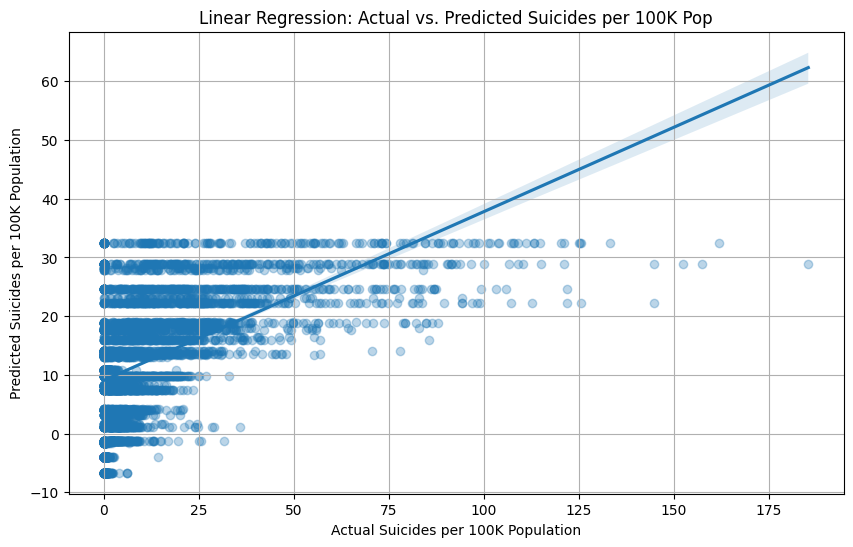

In [26]:
# --- Linear Regression ---

# Split data into training and testing sets
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X, y_linear, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_lin, y_train_lin)

# Make predictions on the test set
y_pred_lin = linear_model.predict(X_test_lin)

# Evaluate the model
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
r2_lin = r2_score(y_test_lin, y_pred_lin)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"R-squared: {r2_lin:.2f}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_lin, y=y_pred_lin, scatter_kws={'alpha':0.3})
plt.xlabel('Actual Suicides per 100K Population')
plt.ylabel('Predicted Suicides per 100K Population')
plt.title('Linear Regression: Actual vs. Predicted Suicides per 100K Pop')
plt.grid(True)
plt.show()

### Logistic Regression Model


--- Logistic Regression Results ---
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      2813
           1       0.73      0.71      0.72      2719

    accuracy                           0.73      5532
   macro avg       0.73      0.73      0.73      5532
weighted avg       0.73      0.73      0.73      5532



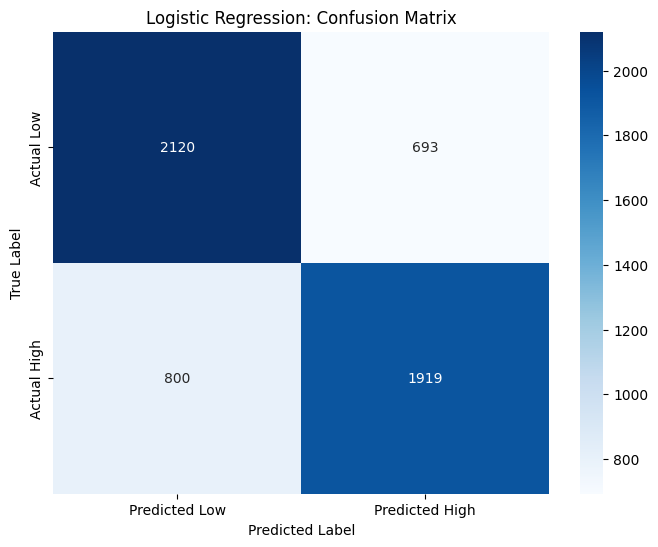

In [27]:
# --- Logistic Regression ---

# Split data into training and testing sets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear') # Increased max_iter for convergence
logistic_model.fit(X_train_log, y_train_log)

# Make predictions on the test set
y_pred_log = logistic_model.predict(X_test_log)

# Evaluate the model
accuracy_log = accuracy_score(y_test_log, y_pred_log)

print("--- Logistic Regression Results ---")
print(f"Accuracy: {accuracy_log:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_log, y_pred_log))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression: Confusion Matrix')
plt.show()